# Use Detail Age to Predict

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls /content/drive/My\ Drive/Colab\ Notebooks

 558_Assignments_Code		  Kaggle
 6.1.2_medical_transcript.ipynb   my_own_code
 data				 'powerful word.ipynb'
'Fondation Final Project'


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import metrics

# Model Data Set Generating - mdl_data

In [3]:
'''Loading Data from selected mortality dataset(only 15 columns)'''

df=[] #len=11, each = 1yr
for i in range(2005,2016):
    url = '/content/drive/My Drive/Colab Notebooks/Fondation Final Project/data/mortality_selected/'+str(i)+'.csv'
    df1 = pd.read_csv(url)
    df.append(df1)
    print('Loading data of year',i)
del df1

Loading data of year 2005
Loading data of year 2006
Loading data of year 2007
Loading data of year 2008
Loading data of year 2009
Loading data of year 2010
Loading data of year 2011
Loading data of year 2012
Loading data of year 2013
Loading data of year 2014
Loading data of year 2015


In [4]:
df[0][:2]

,education_1989_revision,education_2003_revision,education_reporting_flag,month_of_death,sex,detail_age,marital_status,day_of_week_of_death,current_data_year,injury_at_work,manner_of_death,activity_code,race,5y_age_band_recode,rankable_cause_recode
0,11.0,NaN,0,1,F,45,M,2,2005,U,7.0,NaN,1,10,4
1,13.0,NaN,0,1,M,61,D,7,2005,U,7.0,NaN,1,13,13


In [5]:
'''drop unused columns'''
'''Used ones: Year, 5y_age_band_recode, Sex, Race, rankable_cause_recode，month_of_death，'marital_status' '''
#use year,sex,race,age_band, cause_recode
unused_cols = ['education_1989_revision','education_2003_revision','education_reporting_flag',
               'day_of_week_of_death','injury_at_work', 'manner_of_death', 'activity_code','detail_age']
for i in range(11):
    df[i].drop(unused_cols, axis=1, inplace=True)
    print(df[i].columns.values)

['month_of_death' 'sex' 'marital_status' 'current_data_year' 'race'
 '5y_age_band_recode' 'rankable_cause_recode']
['month_of_death' 'sex' 'marital_status' 'current_data_year' 'race'
 '5y_age_band_recode' 'rankable_cause_recode']
['month_of_death' 'sex' 'marital_status' 'current_data_year' 'race'
 '5y_age_band_recode' 'rankable_cause_recode']
['month_of_death' 'sex' 'marital_status' 'current_data_year' 'race'
 '5y_age_band_recode' 'rankable_cause_recode']
['month_of_death' 'sex' 'marital_status' 'current_data_year' 'race'
 '5y_age_band_recode' 'rankable_cause_recode']
['month_of_death' 'sex' 'marital_status' 'current_data_year' 'race'
 '5y_age_band_recode' 'rankable_cause_recode']
['month_of_death' 'sex' 'marital_status' 'current_data_year' 'race'
 '5y_age_band_recode' 'rankable_cause_recode']
['month_of_death' 'sex' 'marital_status' 'current_data_year' 'race'
 '5y_age_band_recode' 'rankable_cause_recode']
['month_of_death' 'sex' 'marital_status' 'current_data_year' 'race'
 '5y_age_ban

In [0]:
mdl_data = df[0]
#for i in range(1,11):
mdl_data = pd.concat([mdl_data,df[1],df[2],df[3],df[4],df[5],df[6],df[7],df[8],df[9],df[10]], axis=0)
#print(mdl_data['current_data_year'].unique())
del df

In [0]:
mdl_data = mdl_data[mdl_data['rankable_cause_recode'].isin([4])]

In [8]:
mdl_data

,month_of_death,sex,marital_status,current_data_year,race,5y_age_band_recode,rankable_cause_recode
0,1,F,M,2005,1,10,4
4,1,F,M,2005,1,14,4
9,1,F,W,2005,1,18,4
11,1,M,M,2005,2,16,4
13,1,M,M,2005,1,10,4
...,...,...,...,...,...,...,...
2718167,12,F,S,2015,2,13,4
2718171,12,M,D,2015,28,12,4
2718179,12,M,D,2015,2,13,4
2718186,12,M,W,2015,1,17,4


In [0]:
gbydata = mdl_data.groupby(by=['sex', 'current_data_year', 'race', '5y_age_band_recode','month_of_death','marital_status']).size()

In [10]:
gbydata.values

array([13, 18, 14, ...,  3,  1,  1])

In [0]:
x = []
for i in range(gbydata.size):
  x.append(list(gbydata.index.values[i]))
#x

In [12]:
mdl_data = pd.DataFrame(data=x, columns=['sex', 'current_data_year', 'race', '5y_age_band_recode','month_of_death','marital_status' ])
mdl_data['death_num'] = gbydata.values
mdl_data

,sex,current_data_year,race,5y_age_band_recode,month_of_death,marital_status,death_num
0,F,2005,1,1,1,S,13
1,F,2005,1,1,2,S,18
2,F,2005,1,1,3,S,14
3,F,2005,1,1,4,S,7
4,F,2005,1,1,5,S,17
...,...,...,...,...,...,...,...
103814,M,2015,78,19,10,W,2
103815,M,2015,78,19,11,M,1
103816,M,2015,78,19,11,W,3
103817,M,2015,78,19,12,M,1


# Data Wrangling

In [13]:
mdl_data.describe()

,current_data_year,race,5y_age_band_recode,month_of_death,death_num
count,103819.000000,103819.000000,103819.000000,103819.000000,103819.000000
mean,2010.130073,16.189907,13.287732,6.523026,60.964457
std,3.156701,23.878173,4.253353,3.456273,223.978959
min,2005.000000,1.000000,1.000000,1.000000,1.000000
25%,2007.000000,2.000000,11.000000,4.000000,1.000000
50%,2010.000000,4.000000,14.000000,7.000000,3.000000
75%,2013.000000,18.000000,16.000000,10.000000,14.000000
max,2015.000000,78.000000,27.000000,12.000000,2533.000000


## death number distribution

In [14]:
mdl_data.groupby(by=['death_num']).size().sort_index(ascending=False)

death_num
2533        1
2474        1
2448        1
2447        1
2445        1
        ...  
5        4137
4        5197
3        7886
2       13469
1       33373
Length: 1858, dtype: int64

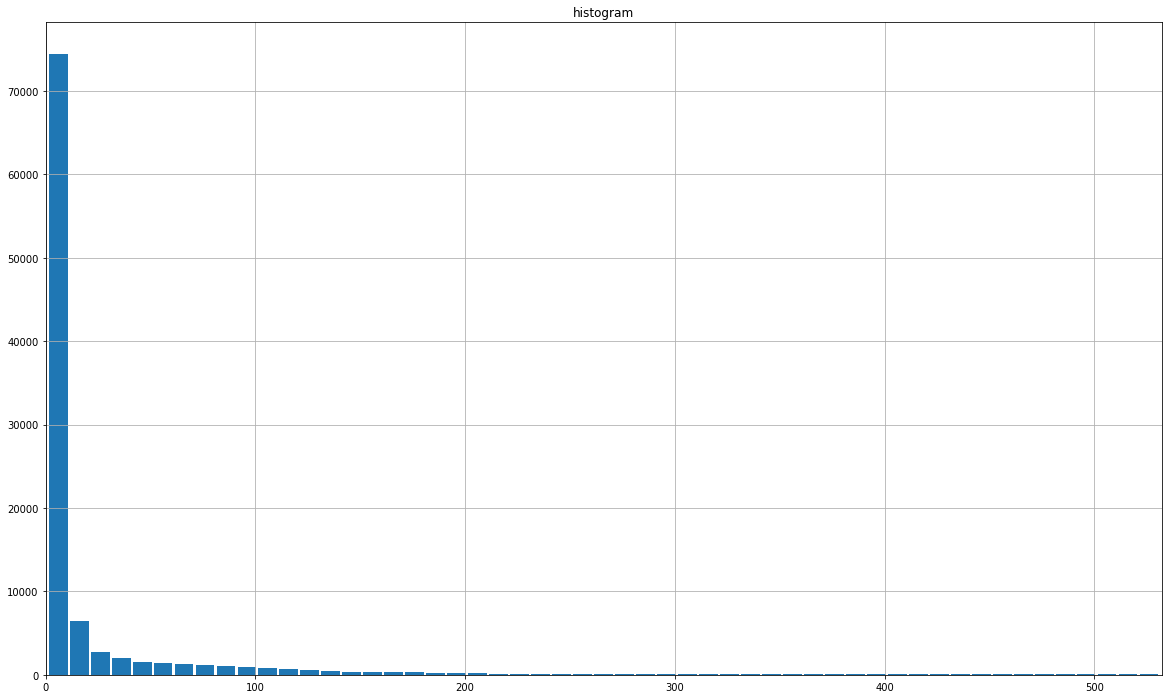

In [15]:
plt.figure(figsize=(20,12))
plt.hist(mdl_data['death_num'], bins=np.arange(1, 532,10), rwidth=0.9)
#plt.ylim(0,100)
plt.xlim(0,532)
plt.grid(axis='both')
plt.title("histogram")
plt.show()

## year, sex, race, age distribution

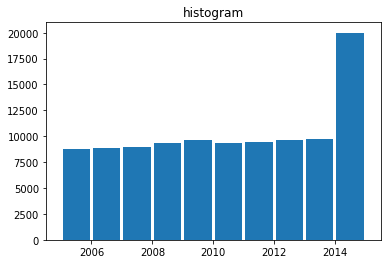

In [0]:
#year
#np.unique(mdl_data['current_data_year'])
plt.hist(mdl_data['current_data_year'], bins = np.arange(2004,2016), rwidth=0.9)
plt.title("histogram")
plt.xlim(2004.5,2015.5)
#plt.xticks(np.arange(2005,2017))
plt.show()

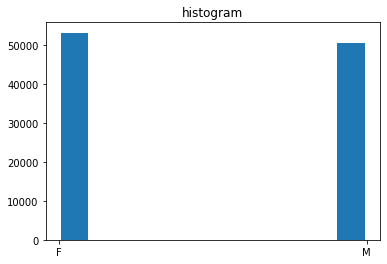

In [0]:
#sex
#np.unique(mdl_data['current_data_year'])
#binblock=np.arange(2005,2016, 1)
plt.hist(mdl_data['sex'], rwidth=0.9)
plt.title("histogram")
#plt.xticks(np.arange(2005,2016))
plt.show()

In [0]:
np.unique(mdl_data['race'])

array([ 1,  2,  3,  4,  5,  6,  7, 18, 28, 38, 48, 58, 68, 78])

In [0]:
mdl_data['race_str'] = mdl_data['race'].astype(str)

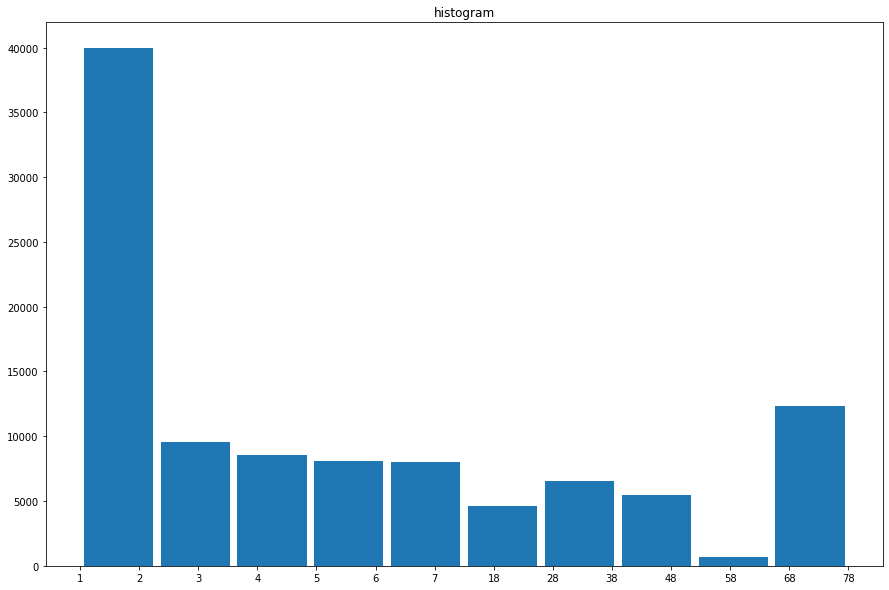

In [0]:
#race
#np.unique(mdl_data['sex'])
plt.figure(figsize=(15,10))
plt.hist(mdl_data['race_str'], rwidth=0.9)
plt.title("histogram")
#plt.xticks(np.arange(1,79))
plt.show()

In [0]:
np.unique(mdl_data['5y_age_band_recode'])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 26, 27])

In [0]:
#drop data with 999 age
mdl_data = mdl_data[~mdl_data['5y_age_band_recode'].isin([999])]
#mdl_data['detail_age'].unique()

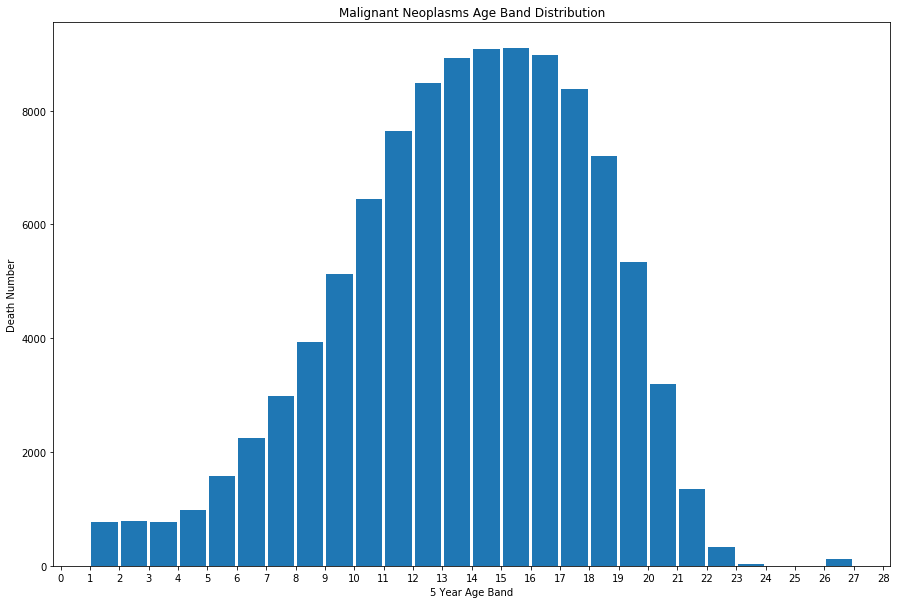

In [16]:
#age
#np.unique(mdl_data['sex'])
plt.figure(figsize=(15,10))
plt.hist(mdl_data['5y_age_band_recode'], bins=np.arange(1,28), rwidth=0.9)
plt.title("Malignant Neoplasms Age Band Distribution")
plt.xlabel('5 Year Age Band')
plt.ylabel('Death Number')
plt.xticks(np.arange(0,29))
plt.show()

In [0]:
mdl_data['month_str'] = mdl_data['month_of_death'].astype(str)

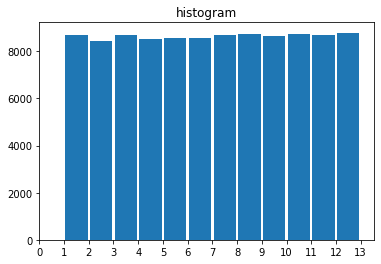

In [0]:
# month of death
plt.hist(mdl_data['month_of_death'], bins=np.arange(1,14), rwidth=0.9)
plt.title("histogram")
plt.xticks(np.arange(14),('0','1','2','3','4','5','6','7','8','9','10','11','12','13'))
plt.xlim(left=0)
plt.show()

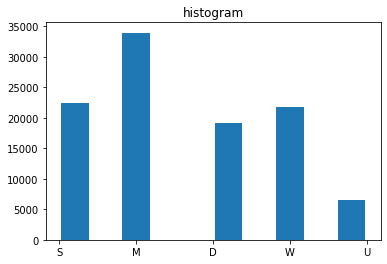

In [0]:
# marital_status
plt.hist(mdl_data['marital_status'], rwidth=0.9)
plt.title("histogram")
#plt.xticks(np.arange(5),('S', 'M','D','W','U'))
#plt.xlim(left=0)
plt.show()

# Relation Visualization



## current_data_year ~ death number

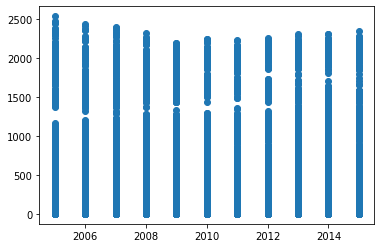

In [0]:
plt.scatter(mdl_data['current_data_year'], mdl_data['death_num'])
plt.show()

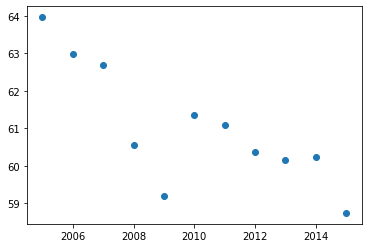

In [0]:
dnum_year = mdl_data[['current_data_year','death_num']].groupby('current_data_year').mean().reset_index()
plt.scatter(dnum_year['current_data_year'], dnum_year['death_num'])
plt.show()

## sex - death number relation


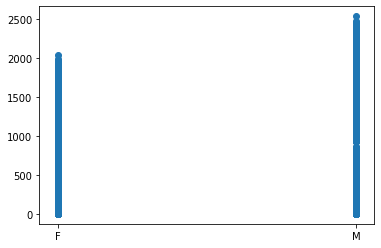

In [0]:
plt.scatter(mdl_data['sex'], mdl_data['death_num'])
plt.show()

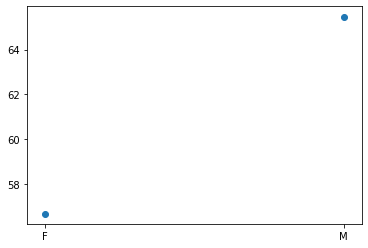

In [0]:
dnum_sex = mdl_data[['sex','death_num']].groupby('sex').mean().reset_index()
plt.scatter(dnum_sex['sex'], dnum_sex['death_num'])
plt.show()

## Race ~ Death Number
problem: unbalanced number of death for various race
  need a percentage data of each race to solve the problem.

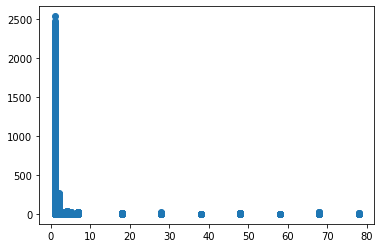

In [0]:
plt.scatter(mdl_data['race'], mdl_data['death_num'])
#x_labels = mdl_data['race'].unique().astype(str)
#plt.xticks()
plt.show()

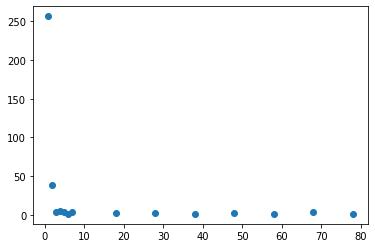

In [0]:
dnum_race = mdl_data[['race','death_num']].groupby('race').mean().reset_index()
plt.scatter(dnum_race['race'], dnum_race['death_num'])
#plt.ylim(0,10)
plt.show()

## Age ~ Death Number

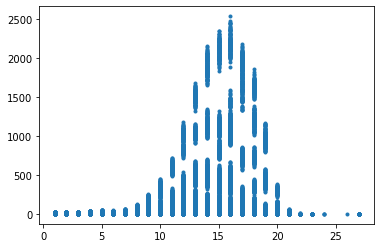

In [0]:
plt.scatter(mdl_data['5y_age_band_recode'], mdl_data['death_num'], marker='.')
plt.show()

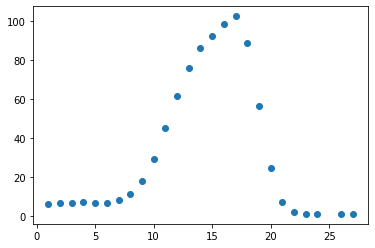

In [0]:
dnum_age = mdl_data[['5y_age_band_recode','death_num']].groupby('5y_age_band_recode').mean().reset_index()
plt.scatter(dnum_age['5y_age_band_recode'], dnum_age['death_num'])
plt.show()

## Month ~ Death Number

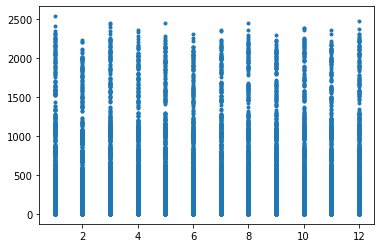

In [0]:
plt.scatter(mdl_data['month_of_death'], mdl_data['death_num'], marker='.')
plt.show()

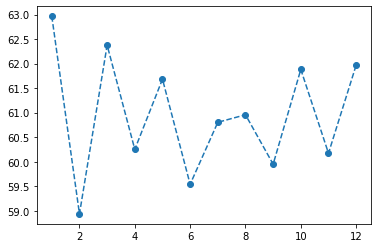

In [0]:
dnum_age = mdl_data[['month_of_death','death_num']].groupby('month_of_death').mean().reset_index()
plt.plot(dnum_age['month_of_death'], dnum_age['death_num'], '--o')
plt.show()

# Feature Engineering

In [0]:
mdl_data

,sex,current_data_year,race,5y_age_band_recode,month_of_death,marital_status,death_num,race_str,month_str
0,F,2005,1,1,1,S,13,1,1
1,F,2005,1,1,2,S,18,1,2
2,F,2005,1,1,3,S,14,1,3
3,F,2005,1,1,4,S,7,1,4
4,F,2005,1,1,5,S,17,1,5
...,...,...,...,...,...,...,...,...,...
103814,M,2015,78,19,10,W,2,78,10
103815,M,2015,78,19,11,M,1,78,11
103816,M,2015,78,19,11,W,3,78,11
103817,M,2015,78,19,12,M,1,78,12


In [0]:
sex_onehot = pd.get_dummies(mdl_data['sex'],prefix='sex')
#mdl_data['racestr'] = mdl_data['race'].astype(str)
race_onehot = pd.get_dummies(mdl_data['race_str'],prefix='race')
month_onehot = pd.get_dummies(mdl_data['month_str'],prefix='month')
marital_onehot = pd.get_dummies(mdl_data['marital_status'], prefix='marital')
age_onehot = pd.get_dummies(mdl_data['5y_age_band_recode'], prefix='age')
mdl_data = pd.concat([mdl_data, sex_onehot, race_onehot, month_onehot, marital_onehot, age_onehot], axis=1)
mdl_data

,sex,current_data_year,race,5y_age_band_recode,month_of_death,marital_status,death_num,race_str,month_str,sex_F,sex_M,race_1,race_18,race_2,race_28,race_3,race_38,race_4,race_48,race_5,race_58,race_6,race_68,race_7,race_78,month_1,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,marital_D,marital_M,marital_S,marital_U,marital_W,age_1,age_2,age_3,age_4,age_5,age_6,age_7,age_8,age_9,age_10,age_11,age_12,age_13,age_14,age_15,age_16,age_17,age_18,age_19,age_20,age_21,age_22,age_23,age_24,age_26,age_27
0,F,2005,1,1,1,S,13,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,F,2005,1,1,2,S,18,1,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,F,2005,1,1,3,S,14,1,3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,F,2005,1,1,4,S,7,1,4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,F,2005,1,1,5,S,17,1,5,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103814,M,2015,78,19,10,W,2,78,10,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
103815,M,2015,78,19,11,M,1,78,11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
103816,M,2015,78,19,11,W,3,78,11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
103817,M,2015,78,19,12,M,1,78,12,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


# Modeling 1st Try

In [0]:
mdl_data.columns

Index(['sex', 'current_data_year', 'race', '5y_age_band_recode',
       'month_of_death', 'marital_status', 'death_num', 'race_str',
       'month_str', 'sex_F', 'sex_M', 'race_1', 'race_18', 'race_2', 'race_28',
       'race_3', 'race_38', 'race_4', 'race_48', 'race_5', 'race_58', 'race_6',
       'race_68', 'race_7', 'race_78', 'month_1', 'month_10', 'month_11',
       'month_12', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'marital_D', 'marital_M', 'marital_S',
       'marital_U', 'marital_W', 'age_1', 'age_2', 'age_3', 'age_4', 'age_5',
       'age_6', 'age_7', 'age_8', 'age_9', 'age_10', 'age_11', 'age_12',
       'age_13', 'age_14', 'age_15', 'age_16', 'age_17', 'age_18', 'age_19',
       'age_20', 'age_21', 'age_22', 'age_23', 'age_24', 'age_26', 'age_27'],
      dtype='object')

In [0]:
X=mdl_data[['current_data_year', 
        'sex_F', 'sex_M', 'race_1', 'race_18', 'race_2', 'race_28',
       'race_3', 'race_38', 'race_4', 'race_48', 'race_5', 'race_58', 'race_6',
       'race_68', 'race_7', 'race_78', 'month_1', 'month_10', 'month_11',
       'month_12', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'marital_D', 'marital_M', 'marital_S',
       'marital_U', 'marital_W','age_1', 'age_2', 'age_3', 'age_4', 'age_5',
       'age_6', 'age_7', 'age_8', 'age_9', 'age_10', 'age_11', 'age_12',
       'age_13', 'age_14', 'age_15', 'age_16', 'age_17', 'age_18', 'age_19',
       'age_20', 'age_21', 'age_22', 'age_23', 'age_24', 'age_26', 'age_27']]
y=mdl_data['death_num']
X=sm.add_constant(X)
X

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,current_data_year,sex_F,sex_M,race_1,race_18,race_2,race_28,race_3,race_38,race_4,race_48,race_5,race_58,race_6,race_68,race_7,race_78,month_1,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,marital_D,marital_M,marital_S,marital_U,marital_W,age_1,age_2,age_3,age_4,age_5,age_6,age_7,age_8,age_9,age_10,age_11,age_12,age_13,age_14,age_15,age_16,age_17,age_18,age_19,age_20,age_21,age_22,age_23,age_24,age_26,age_27
0,1.0,2005,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,2005,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,2005,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,2005,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,2005,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103814,1.0,2015,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
103815,1.0,2015,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
103816,1.0,2015,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
103817,1.0,2015,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [0]:
model_1 = sm.GLM(y, X, family=sm.families.Poisson()).fit()
print (model_1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              death_num   No. Observations:               103819
Model:                            GLM   Df Residuals:                   103763
Model Family:                 Poisson   Df Model:                           55
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.4648e+06
Date:                Wed, 04 Dec 2019   Deviance:                   2.5521e+06
Time:                        21:52:01   Pearson chi2:                 3.03e+06
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -7.6580      0.13

In [0]:
mdl_data['pred1'] = model_1.predict(X)
mdl_data

,sex,current_data_year,race,5y_age_band_recode,month_of_death,marital_status,death_num,race_str,month_str,sex_F,sex_M,race_1,race_18,race_2,race_28,race_3,race_38,race_4,race_48,race_5,race_58,race_6,race_68,race_7,race_78,month_1,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,marital_D,marital_M,marital_S,marital_U,marital_W,age_1,age_2,age_3,age_4,age_5,age_6,age_7,age_8,age_9,age_10,age_11,age_12,age_13,age_14,age_15,age_16,age_17,age_18,age_19,age_20,age_21,age_22,age_23,age_24,age_26,age_27,pred1
0,F,2005,1,1,1,S,13,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15.164956
1,F,2005,1,1,2,S,18,1,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13.769792
2,F,2005,1,1,3,S,14,1,3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14.972351
3,F,2005,1,1,4,S,7,1,4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14.251867
4,F,2005,1,1,5,S,17,1,5,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14.614797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103814,M,2015,78,19,10,W,2,78,10,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.720395
103815,M,2015,78,19,11,M,1,78,11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1.305467
103816,M,2015,78,19,11,W,3,78,11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.697110
103817,M,2015,78,19,12,M,1,78,12,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1.359652


In [0]:
print('In Sample MSE: {}'.format(metrics.mean_squared_error(mdl_data['death_num'], mdl_data['pred1'])))
print('In Sample R2: {}'.format(metrics.r2_score(mdl_data['death_num'], mdl_data['pred1'])))

In Sample MSE: 10299.42010792748
In Sample R2: 0.7946935890728574


## Interpretion & Visualize

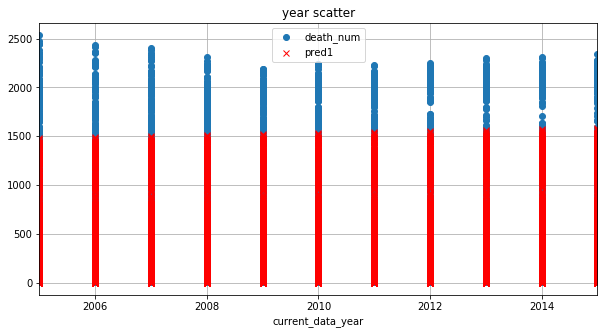

In [0]:
# Year
mdl_data.plot(x='current_data_year', y=['death_num', 'pred1'], figsize=(10,5), grid=True, style=['o','rx'])
plt.title('year scatter')
plt.show()

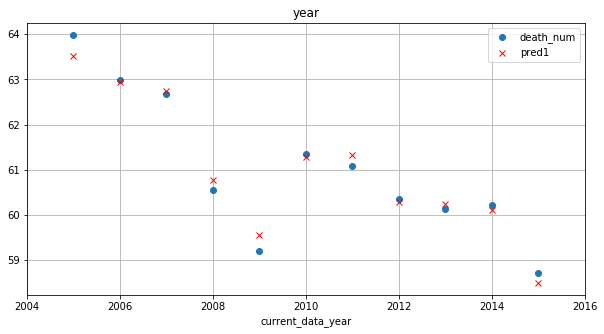

In [0]:
data_agg=mdl_data[['pred1','death_num', 'current_data_year']].groupby('current_data_year').mean().reset_index()
data_agg.plot(x='current_data_year', y=['death_num', 'pred1'], figsize=(10,5), grid=True, style=['o','rx'])
plt.xlim(2004,2016)
plt.title('year')
plt.show()

In [0]:
# detail_age

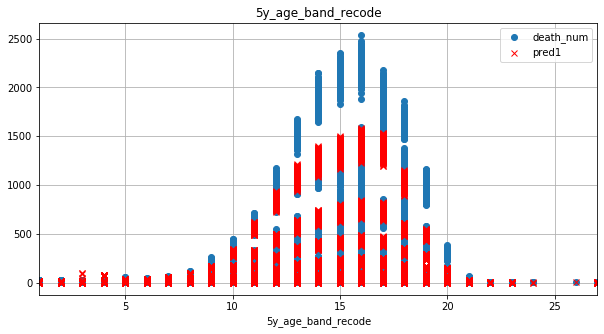

In [0]:
mdl_data.plot(x='5y_age_band_recode', y=['death_num', 'pred1'], figsize=(10,5), grid=True, style=['o','rx'])
plt.title('5y_age_band_recode')
plt.show()

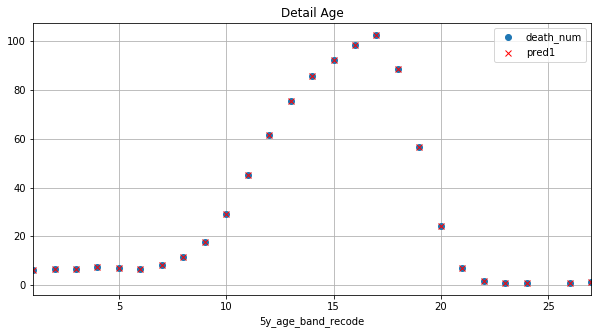

In [0]:
data_agg=mdl_data[['pred1','death_num', '5y_age_band_recode']].groupby('5y_age_band_recode').mean().reset_index()
data_agg.plot(x='5y_age_band_recode', y=['death_num', 'pred1'], figsize=(10,5), grid=True, style=['o','rx'])
#plt.xlim(2004,2016)
plt.title('Detail Age')
plt.show()

In [0]:
# Sex

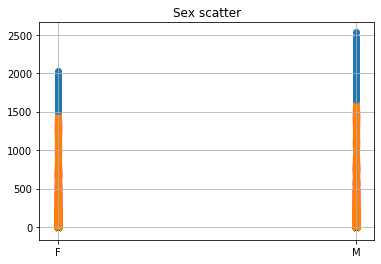

In [0]:
plt.scatter(x=mdl_data['sex'], y=mdl_data['death_num'])
plt.scatter(x=mdl_data['sex'], y=mdl_data['pred1'], marker='x')
#mdl_data.plot(x='sex', y=['death_num', 'pred1'], figsize=(10,5), grid=True, style=['o','rx'])
plt.grid(axis='both')
plt.title('Sex scatter')
plt.show()

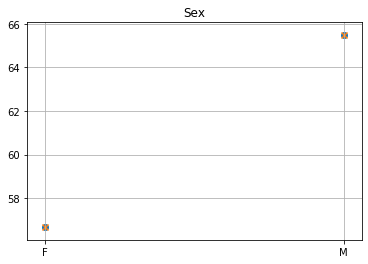

In [0]:
data_agg=mdl_data[['pred1','death_num', 'sex']].groupby('sex').mean().reset_index()
plt.scatter(x=data_agg['sex'], y=data_agg['death_num'])
plt.scatter(x=data_agg['sex'], y=data_agg['pred1'], marker='x')
plt.grid(axis='both')
plt.title('Sex')
plt.show()

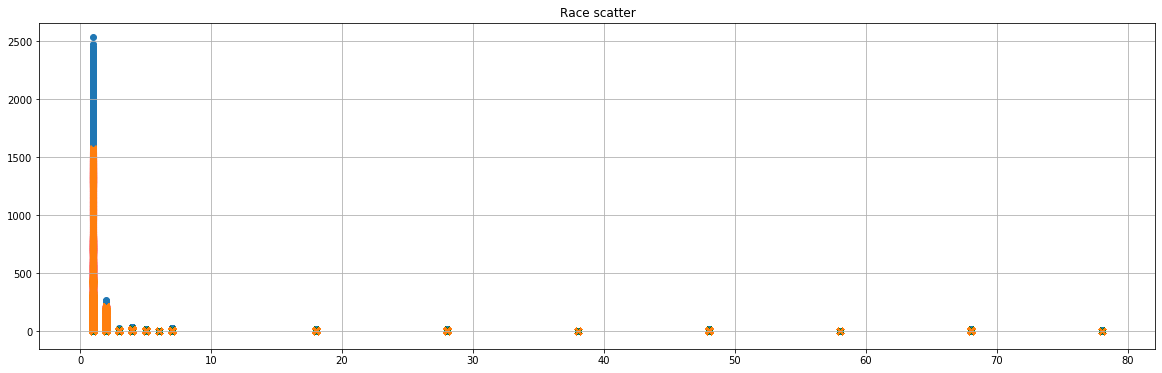

In [0]:
plt.figure(figsize=(20,6))
plt.scatter(x=mdl_data['race'], y=mdl_data['death_num'])
plt.scatter(x=mdl_data['race'], y=mdl_data['pred1'], marker='x')
#mdl_data.plot(x='race', y=['death_num', 'pred1'], figsize=(10,5), grid=True, style=['o','rx'])
plt.grid(axis='both')
plt.title('Race scatter')
plt.show()

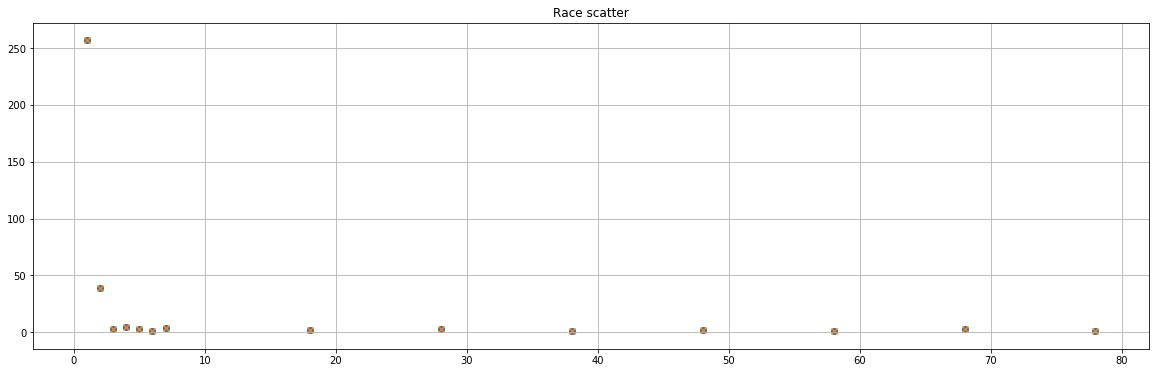

In [0]:
data_agg=mdl_data[['pred1','death_num', 'race']].groupby('race').mean().reset_index()
plt.figure(figsize=(20,6))
plt.scatter(x=data_agg['race'], y=data_agg['death_num'])
plt.scatter(x=data_agg['race'], y=data_agg['pred1'], marker='x')
#mdl_data.plot(x='race', y=['death_num', 'pred1'], figsize=(10,5), grid=True, style=['o','rx'])
plt.grid(axis='both')
plt.title('Race scatter')
plt.show()

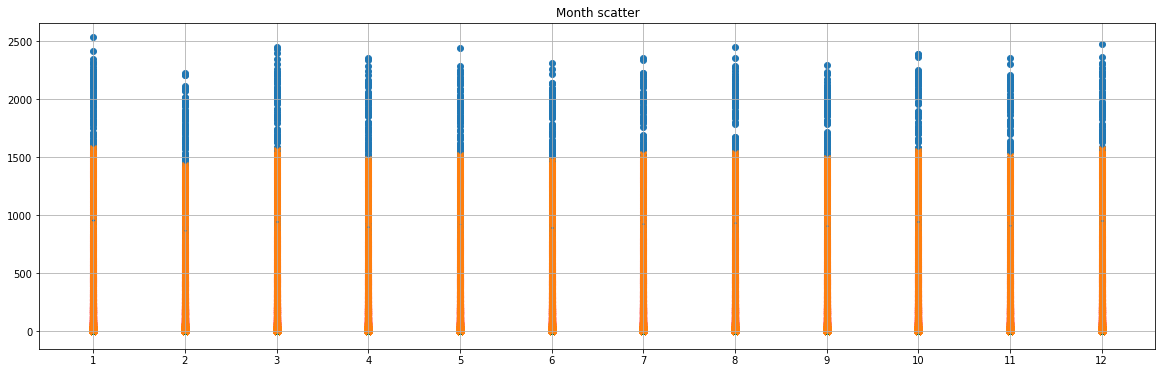

In [0]:
# Month of Death
plt.figure(figsize=(20,6))
plt.scatter(x=mdl_data['month_of_death'], y=mdl_data['death_num'])
plt.scatter(x=mdl_data['month_of_death'], y=mdl_data['pred1'], marker='x')
#mdl_data.plot(x='race', y=['death_num', 'pred1'], figsize=(10,5), grid=True, style=['o','rx'])
plt.grid(axis='both')
plt.xticks(np.arange(1,13))
plt.title('Month scatter')
plt.show()

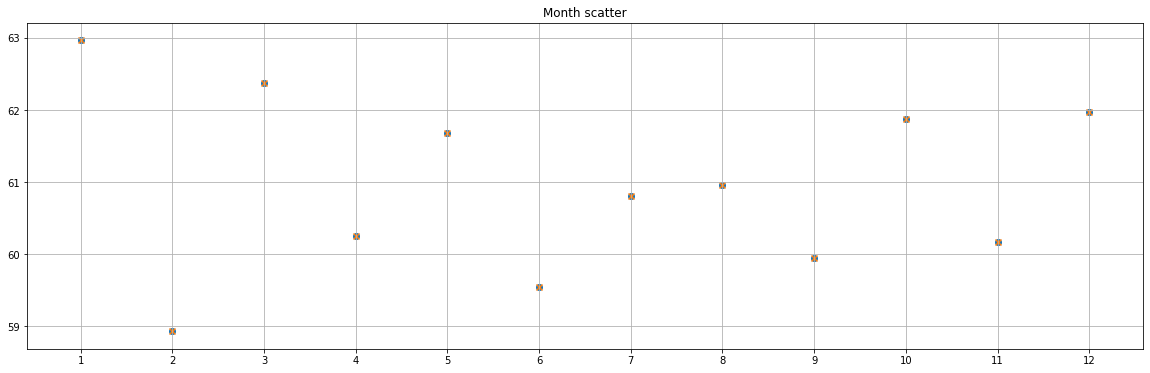

In [0]:
data_agg=mdl_data[['pred1','death_num', 'month_of_death']].groupby('month_of_death').mean().reset_index()

plt.figure(figsize=(20,6))
plt.scatter(x=data_agg['month_of_death'], y=data_agg['death_num'])
plt.scatter(x=data_agg['month_of_death'], y=data_agg['pred1'], marker='x')
#mdl_data.plot(x='race', y=['death_num', 'pred1'], figsize=(10,5), grid=True, style=['o','rx'])
plt.grid(axis='both')
plt.xticks(np.arange(1,13))
plt.title('Month scatter')
plt.show()

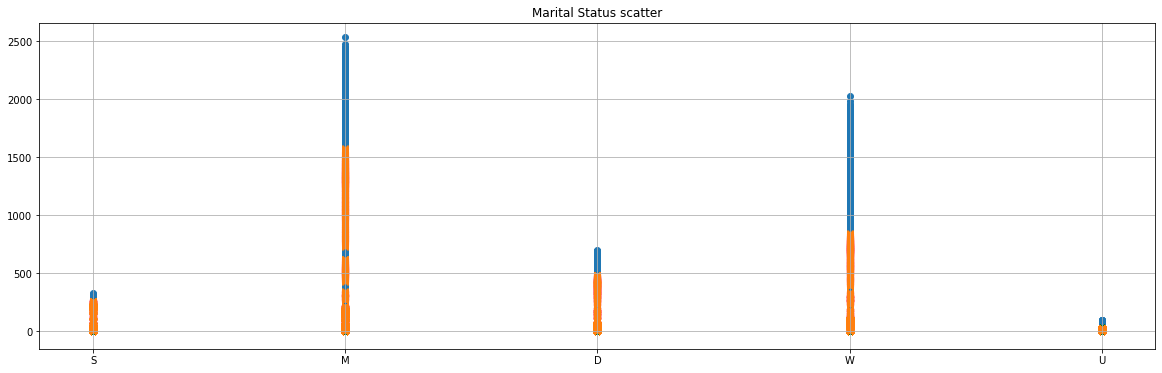

In [0]:
#marital Status
plt.figure(figsize=(20,6))
plt.scatter(x=mdl_data['marital_status'], y=mdl_data['death_num'])
plt.scatter(x=mdl_data['marital_status'], y=mdl_data['pred1'], marker='x')
#mdl_data.plot(x='race', y=['death_num', 'pred1'], figsize=(10,5), grid=True, style=['o','rx'])
plt.grid(axis='both')
#plt.xticks(np.arange(1,13))
plt.title('Marital Status scatter')
plt.show()

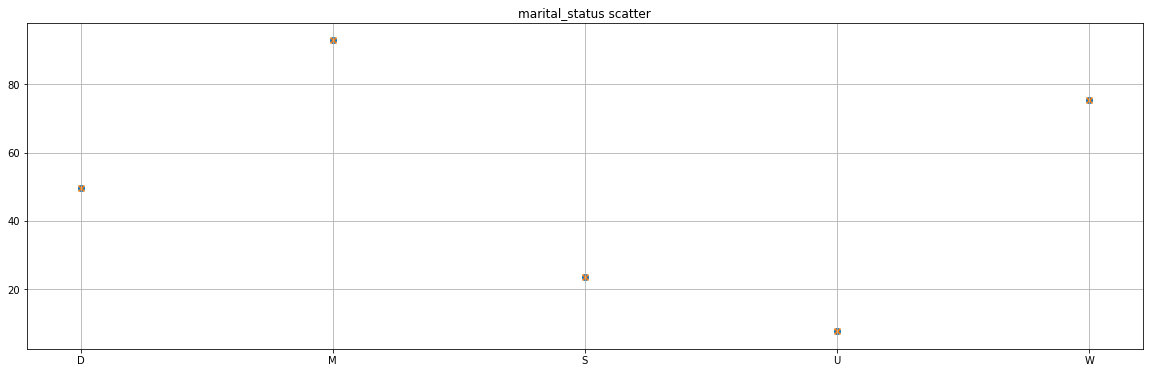

In [0]:
data_agg=mdl_data[['pred1','death_num', 'marital_status']].groupby('marital_status').mean().reset_index()

plt.figure(figsize=(20,6))
plt.scatter(x=data_agg['marital_status'], y=data_agg['death_num'])
plt.scatter(x=data_agg['marital_status'], y=data_agg['pred1'], marker='x')
#mdl_data.plot(x='race', y=['death_num', 'pred1'], figsize=(10,5), grid=True, style=['o','rx'])
plt.grid(axis='both')
#plt.xticks(np.arange(1,13))
plt.title('marital_status scatter')
plt.show()